# Assignment 1: K- Nearest Neighbours (K-NN)
In this assignment, you are required to implement a k-NN classifier to perform image classification on the USPS dataset. First, set up the environment and load the dataset as follows.

In [1]:
# Run this cell to set up the environment and data

import os
import sys
sys.path.append("../../homework/")

import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

# Load the USPS data
usps_dir = "../data/usps.h5"
import h5py
with h5py.File(usps_dir, 'r') as hf:
        train = hf.get('train')
        trainX = train.get('data')[:]
        trainy = train.get('target')[:]
        test = hf.get('test')
        testX = test.get('data')[:]
        testy = test.get('target')[:]
        
# A small subset of USPS for you to run kNN on
# as kNN is a little bit slow
sub_trainX, sub_trainy = trainX[:5000], trainy[:5000]
sub_testX, sub_testy = testX[:1000], testy[:1000]


## kNN
Next, implement the k-NN classifier which consists of the following two stages:
- **Training stage**: k-NN classifier loads the training data and remembers it;
- **Testing stage**: k-NN classifies every test image by comparing with all training images and transferring the labels of the `k` most similar training examples.


### Training Stage:

In [2]:
from knn import KNN

classifier = KNN()
classifier.train(sub_trainX, sub_trainy)

### Testing Stage:

Implement the k-NN classifier by completing the class method `KNN.predict` in `homework/Assignment1/knn.py` and evaluate the k-NN classification error.

In [3]:
y_pred = classifier.predict(sub_testX, k=1)

acc = np.sum(y_pred == sub_testy) / len(sub_testy)
print("Accuracy: ", acc)

Accuracy:  0.942


## Cross Validation:
To find the best `k`, it is tempting to test different `k` on the test data. However, this leads to **overfitting** the test data.

Read [Section 5.3.1](https://www.deeplearningbook.org/contents/ml.html) of the *Deep Learning* book for information about **cross validation** which is a technique for testing a model on unseen data. 

Complete the cell below to carry out cross-validation as follows: split the training data and the corresponding labels into 5 subsets(folds), and then do a 5-fold cross validation to test different values of `k`.

In [4]:
# k_to_accuracies is a dictionary to hold the classification accuracies obtained when
# running cross-validation for different values of k. After running cross-validation,
# k_to_accuracies[k] would comprise 5 classification accuracy values found for the 
# particular value of k.
k_to_accuracies = {}

################################################################################
# TODO:     WRITE CODE FOR THE FOLLOWING                                       #
# Perform 5-fold cross validation to find the best value of k as follows: for  #
# each value of k being considered, run the k-NN algorithm 5 times where in    #
# each run, one fold is used as validation data while the other folds are      #
# used as training data. Store the accuracies for all folds for each value     #
# of k in the k_to_accuracies dictionary.                                      #
################################################################################
k_cands = [1,2,3,4,5,7,9,12,15,18,22,26,30]
trainX_folds = np.split(sub_trainX,5)
trainy_folds = np.split(sub_trainy,5)

for k in k_cands:
    accs = []
    for i in range(5):
        trainX_fold = trainX_folds.copy()
        trainy_fold = trainy_folds.copy()
        valX_fold = trainX_fold.pop(i)
        valy_fold = trainy_fold.pop(i)
        trainX_fold = np.concatenate(trainX_fold)
        trainy_fold = np.concatenate(trainy_fold)
        classifier.train(trainX_fold, trainy_fold)
        y_pred = classifier.predict(valX_fold, k)
        acc = np.sum(y_pred == valy_fold) / len(valy_fold)
        accs.append(acc)
    k_to_accuracies[k] = accs
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.960000
k = 1, accuracy = 0.975000
k = 1, accuracy = 0.950000
k = 1, accuracy = 0.953000
k = 1, accuracy = 0.961000
k = 2, accuracy = 0.957000
k = 2, accuracy = 0.975000
k = 2, accuracy = 0.947000
k = 2, accuracy = 0.937000
k = 2, accuracy = 0.948000
k = 3, accuracy = 0.957000
k = 3, accuracy = 0.973000
k = 3, accuracy = 0.950000
k = 3, accuracy = 0.954000
k = 3, accuracy = 0.958000
k = 4, accuracy = 0.951000
k = 4, accuracy = 0.972000
k = 4, accuracy = 0.946000
k = 4, accuracy = 0.948000
k = 4, accuracy = 0.952000
k = 5, accuracy = 0.955000
k = 5, accuracy = 0.969000
k = 5, accuracy = 0.946000
k = 5, accuracy = 0.950000
k = 5, accuracy = 0.954000
k = 7, accuracy = 0.950000
k = 7, accuracy = 0.967000
k = 7, accuracy = 0.943000
k = 7, accuracy = 0.938000
k = 7, accuracy = 0.953000
k = 9, accuracy = 0.947000
k = 9, accuracy = 0.964000
k = 9, accuracy = 0.938000
k = 9, accuracy = 0.936000
k = 9, accuracy = 0.943000
k = 12, accuracy = 0.940000
k = 12, accuracy = 0.960000

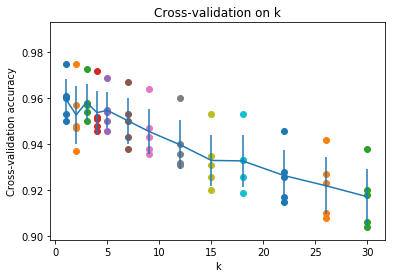

In [5]:
# visualize the results above.

################################################################################
# TODO:     WRITE CODE FOR THE FOLLOWING                                       #
# To better understand the influence of different k values,                    #
# show the above printed results in the scatter plot and then plot the trend   #
# with error bars that correspond to standard deviation.                       #
################################################################################
import matplotlib.pyplot as plt
# scatter plot
for k in k_cands:
    plt.scatter([k]*5,k_to_accuracies[k])

acc_means = []
acc_stds = []
for k in k_cands:
    acc_means.append(np.mean(k_to_accuracies[k]))
    acc_stds.append(np.std(k_to_accuracies[k]))
    
plt.errorbar(k_cands,acc_means,yerr=acc_stds)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [6]:
################################################################################
# TODO:                                                                        #
# Based on the cross-validation results above, identify the best value for k   #
# and apply it to "best_k" below. Then, retrain the classifier using all the   #
# training data, and test it on the test data.                                 #
################################################################################
best_k = 1
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

classifier = KNN()
classifier.train(sub_trainX, sub_trainy)
y_test_pred = classifier.predict(sub_testX, k=best_k)

# Compute and display the accuracy
accuracy = np.sum(y_test_pred == sub_testy) / len(sub_testy)
print('accuracy: %f' % accuracy)

accuracy: 0.942000


**Inline question:**

In practice, why do we often choose an odd number for `k`? Give your answer below.

As we can see from *figure-the Cross-validation on k*, it has obvious vallys as `k = 2,4,12`. The ambiguity will happend when the test point has equal number voters of different classes. If we choose odd number, that case will not happen.